### Import das Libraries e Funcoes

In [1]:
from functions import *
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
  
import warnings
warnings.filterwarnings('ignore')

### Ler o ficheiro CSV com os dados

In [2]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_mensal_clean.csv", sep=",")
opencsv.set_index('Date', inplace=True)

In [3]:
opencsv

,10yr-2y_euro-area,10yr-2y_usa,BalanceSheet_euro-area,BalanceSheet_global,BalanceSheet_japan,BalanceSheet_usa,BTC_price,GDP_japan,GDP_usa,GDP_euro-area,...,PMI_euro-area,PMI_japan,PMI_usa,EURUSD,JPYUSD,JPYEUR,SPY,QQQ,EXSA,JPXN
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,2.415,2.81,1877655.0,11695.0566,1224342.0,2246886.0,NaN,501471.400000,14764.610000,2.695667e+06,...,52.4,53.8,NaN,1.387694,0.011083,0.007980,82.042763,37.488388,17.536154,33.224644
2010-02-28,2.463,2.80,1889017.0,11704.4023,1267675.0,2286127.0,NaN,502639.800000,14836.471000,2.707073e+06,...,54.2,52.5,NaN,1.363791,0.011250,0.008250,84.602051,39.214317,17.486795,33.479210
2010-03-31,2.410,2.82,1894898.0,11815.4072,1218241.0,2307150.0,NaN,503808.200000,14908.332000,2.718479e+06,...,56.6,53.8,NaN,1.350804,0.010693,0.007910,89.384529,42.193047,18.826513,35.207157
2010-04-30,2.385,2.72,1956819.0,11828.0071,1142013.0,2330472.0,NaN,504976.600000,14980.193000,2.729885e+06,...,57.6,53.5,NaN,1.329805,0.010658,0.008010,91.141090,43.185291,18.579716,34.628601
2010-05-31,2.429,2.54,2088450.0,11777.3199,1209586.0,2334041.0,NaN,506956.966667,15033.997667,2.739450e+06,...,55.8,54.7,NaN,1.228788,0.010966,0.008920,83.899483,39.992886,17.733585,31.974955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,-0.421,-0.39,6830940.0,23314.4918,7604307.0,7567807.0,61198.382812,598108.500000,28269.174000,4.353840e+06,...,46.5,47.2,52.2,1.083882,0.006638,0.006122,504.877472,437.724548,48.200256,72.026001
2024-03-31,-0.438,-0.37,6619689.0,23270.8911,7564231.0,7484739.0,71333.648438,598108.500000,28269.174000,4.353840e+06,...,46.1,48.2,51.9,1.080147,0.006608,0.006117,519.773010,442.720001,50.102638,74.376938
2024-04-30,-0.360,-0.35,6598860.0,23246.3192,7583199.0,7402434.0,60636.855469,598108.500000,28269.174000,4.353840e+06,...,45.7,49.6,50.0,1.071570,0.006397,0.005967,500.365784,423.916199,49.778606,70.667015


In [15]:
dados = np.log10(opencsv) # transformacao logaritcmica de todas as colunas
#dados = opencsv
dados

,10yr-2y_euro-area,10yr-2y_usa,BalanceSheet_euro-area,BalanceSheet_global,BalanceSheet_japan,BalanceSheet_usa,BTC_price,GDP_japan,GDP_usa,GDP_euro-area,...,PMI_euro-area,PMI_japan,PMI_usa,EURUSD,JPYUSD,JPYEUR,SPY,QQQ,EXSA,JPXN
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.382917,0.448706,6.273616,4.068002,6.087903,6.351581,NaN,5.700246,4.169222,6.430666,...,1.719331,1.730782,NaN,0.142294,-1.955351,-2.097997,1.914040,1.573897,1.243934,1.521460
2010-02-28,0.391464,0.447158,6.276236,4.068349,6.103008,6.359100,NaN,5.701257,4.171331,6.432500,...,1.733999,1.720159,NaN,0.134748,-1.948853,-2.083546,1.927381,1.593445,1.242710,1.524775
2010-03-31,0.382017,0.450249,6.277586,4.072449,6.085733,6.363076,NaN,5.702265,4.173429,6.434326,...,1.752816,1.730782,NaN,0.130592,-1.970904,-2.101824,1.951262,1.625241,1.274770,1.546631
2010-04-30,0.377488,0.434569,6.291551,4.072912,6.057671,6.367444,NaN,5.703271,4.175517,6.436144,...,1.760422,1.728354,NaN,0.123788,-1.972342,-2.096367,1.959714,1.635336,1.269039,1.539435
2010-05-31,0.385428,0.404834,6.319824,4.071046,6.082637,6.368108,NaN,5.704971,4.177074,6.437663,...,1.746634,1.737987,NaN,0.089477,-1.959947,-2.049635,1.923759,1.601983,1.248797,1.504810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,NaN,NaN,6.834480,4.367626,6.881060,6.878970,4.786740,5.776780,4.451313,6.638872,...,1.667453,1.673942,1.717671,0.034982,-2.177986,-2.213107,2.703186,2.641201,1.683049,1.857489
2024-03-31,NaN,NaN,6.820838,4.366813,6.878765,6.874177,4.853294,5.776780,4.451313,6.638872,...,1.663701,1.683047,1.715167,0.033483,-2.179954,-2.213462,2.715814,2.646129,1.699861,1.871438
2024-04-30,NaN,NaN,6.819469,4.366354,6.879852,6.869375,4.782737,5.776780,4.451313,6.638872,...,1.659916,1.695482,1.698970,0.030021,-2.193998,-2.224244,2.699288,2.627280,1.697043,1.849217


In [16]:
dados = dados.pct_change()
dados = dados.loc["2012-01-01":"2024-06-30"]
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2012-01-31 to 2024-06-30
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   10yr-2y_euro-area        150 non-null    float64
 1   10yr-2y_usa              150 non-null    float64
 2   BalanceSheet_euro-area   150 non-null    float64
 3   BalanceSheet_global      150 non-null    float64
 4   BalanceSheet_japan       150 non-null    float64
 5   BalanceSheet_usa         150 non-null    float64
 6   BTC_price                150 non-null    float64
 7   GDP_japan                150 non-null    float64
 8   GDP_usa                  150 non-null    float64
 9   GDP_euro-area            150 non-null    float64
 10  Breakeven_inflation_usa  150 non-null    float64
 11  CPI_euro-area            146 non-null    float64
 12  CPI_japan                133 non-null    float64
 13  CPI_usa                  150 non-null    float64
 14  PMI_euro-area  

In [17]:
dados.isnull().sum()

10yr-2y_euro-area           0
10yr-2y_usa                 0
BalanceSheet_euro-area      0
BalanceSheet_global         0
BalanceSheet_japan          0
BalanceSheet_usa            0
BTC_price                   0
GDP_japan                   0
GDP_usa                     0
GDP_euro-area               0
Breakeven_inflation_usa     0
CPI_euro-area               4
CPI_japan                  17
CPI_usa                     0
PMI_euro-area               0
PMI_japan                   0
PMI_usa                     6
EURUSD                      0
JPYUSD                      0
JPYEUR                      0
SPY                         0
QQQ                         0
EXSA                        0
JPXN                        0
dtype: int64

In [18]:
np.isinf(dados).sum()

10yr-2y_euro-area          0
10yr-2y_usa                2
BalanceSheet_euro-area     0
BalanceSheet_global        0
BalanceSheet_japan         0
BalanceSheet_usa           0
BTC_price                  0
GDP_japan                  0
GDP_usa                    0
GDP_euro-area              0
Breakeven_inflation_usa    0
CPI_euro-area              3
CPI_japan                  4
CPI_usa                    0
PMI_euro-area              0
PMI_japan                  0
PMI_usa                    0
EURUSD                     0
JPYUSD                     0
JPYEUR                     0
SPY                        0
QQQ                        0
EXSA                       0
JPXN                       0
dtype: int64

In [19]:
# Interpolate to replace inf values
dados.replace([np.inf, -np.inf], np.nan, inplace=True)
dados.interpolate(method='linear', inplace=True)

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2012-01-31 to 2024-06-30
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   10yr-2y_euro-area        150 non-null    float64
 1   10yr-2y_usa              150 non-null    float64
 2   BalanceSheet_euro-area   150 non-null    float64
 3   BalanceSheet_global      150 non-null    float64
 4   BalanceSheet_japan       150 non-null    float64
 5   BalanceSheet_usa         150 non-null    float64
 6   BTC_price                150 non-null    float64
 7   GDP_japan                150 non-null    float64
 8   GDP_usa                  150 non-null    float64
 9   GDP_euro-area            150 non-null    float64
 10  Breakeven_inflation_usa  150 non-null    float64
 11  CPI_euro-area            150 non-null    float64
 12  CPI_japan                150 non-null    float64
 13  CPI_usa                  150 non-null    float64
 14  PMI_euro-area  

<div class="alert alert-block alert-info"><b>Hipoteses</b>

H1: Ceteris paribus, quanto mais liquidez há no mercado, maior é a apreciação de preço de Bitcoin.

H2: Ceteris paribus, Bitcoin é um ativo de refúgio contra a inflação.

H3: Ceteris paribus, quanto mais baixas são as taxas de juro dos bancos centrais, maior será a performance de Bitcoin.

H4: Ceteris paribus, o ciclo económico tem uma correlação forte positiva com a performance de Bitcoin.
</div>

## Teste da Hipotese 1

In [21]:
# Yt = b0 + b1X1t + b2X2t + εt

h1_variables = ["BalanceSheet_euro-area", "BalanceSheet_global", "BalanceSheet_japan", "BalanceSheet_usa"] #

df_h1 = dados[h1_variables].dropna()
df_h1["BTC_price"] = dados["BTC_price"]
df_h1

,BalanceSheet_euro-area,BalanceSheet_global,BalanceSheet_japan,BalanceSheet_usa,BTC_price
Date,,,,,
2012-01-31,-0.001321,-0.000197,-0.003083,-0.000151,0.095951
2012-02-29,0.000252,0.001021,0.003695,0.000142,-0.036140
2012-03-31,0.006496,-0.000553,-0.002380,-0.001101,-0.011323
2012-04-30,-0.000053,0.000509,0.000881,-0.000271,0.012712
2012-05-31,0.000411,0.000292,0.000793,-0.000563,0.020774
...,...,...,...,...,...
2024-02-29,-0.000525,0.000281,0.000333,-0.000517,0.034025
2024-03-31,-0.001996,-0.000186,-0.000334,-0.000697,0.013904
2024-04-30,-0.000201,-0.000105,0.000158,-0.000699,-0.014538


### Matriz de Correlacoes

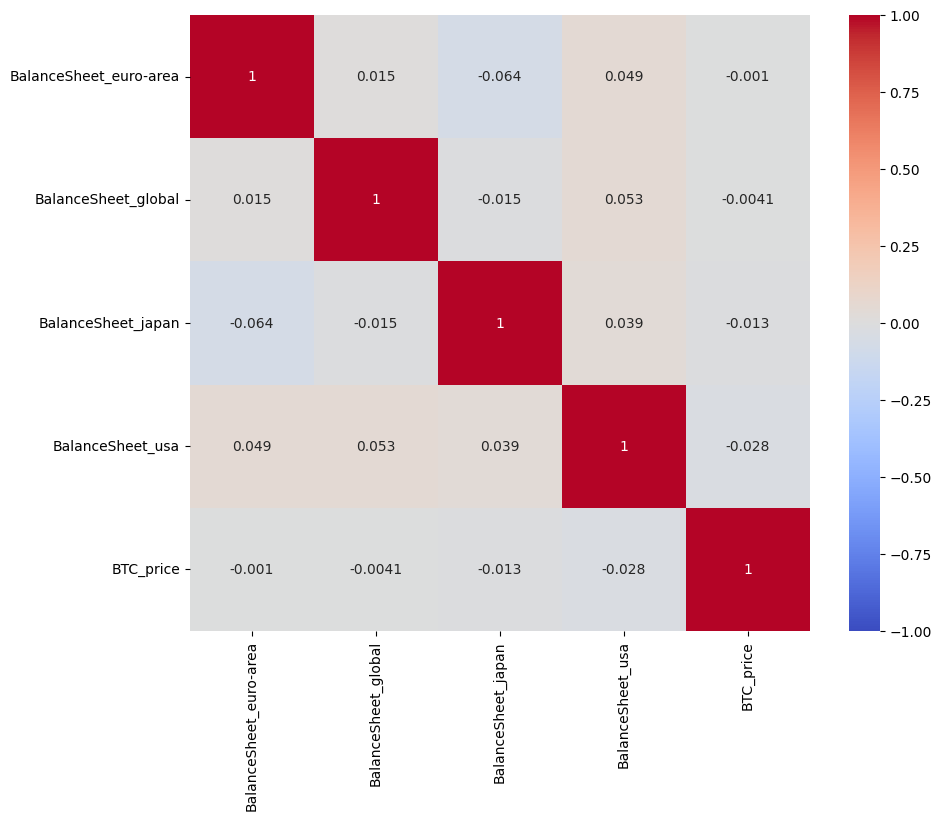

In [22]:
correlation_map(df_h1)

### Regressao Linear Multipla

In [23]:
test_df = dados.drop(["BTC_price", "PMI_usa"], axis = 1)
test_df = test_df.dropna()

In [24]:
# Yt = b0 + b1X1t + b2X2t + εt

X = test_df # inclui todas as variaveis a testar
y = dados["BTC_price"]

X = sm.add_constant(X) # Add a constant term to the predictors

fit = sm.OLS(y, X).fit() # Fit the OLS model

print(fit.summary()) # Print the summary of the regression results

                            OLS Regression Results                            
Dep. Variable:              BTC_price   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     1.808
Date:                Thu, 08 Aug 2024   Prob (F-statistic):             0.0224
Time:                        15:18:49   Log-Likelihood:                 250.65
No. Observations:                 150   AIC:                            -455.3
Df Residuals:                     127   BIC:                            -386.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Stepwise

In [25]:
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Função para a seleção Stepwise
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.1, 
                       threshold_out=0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas DataFrame with candidate features
        y - pandas Series with response
        initial_list - list of features to start with (column names of data)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns:
        List of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Suponha que test_df é o DataFrame com todas as variáveis a serem testadas
# y é a série do preço do Bitcoin
test_df = dados.drop(columns=['BTC_price'])
y = dados['BTC_price']

# Garantir que não há valores infinitos ou NaN
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.dropna(inplace=True)
y = y[test_df.index]

# Aplicar a seleção Stepwise
selected_features = stepwise_selection(test_df, y)
print('Variáveis selecionadas:', selected_features)

# Ajustar o modelo final com as variáveis selecionadas
X_selected = sm.add_constant(test_df[selected_features])
model = sm.OLS(y, X_selected).fit()
print(model.summary())

Add  SPY                            with p-value 0.00299225
Add  CPI_euro-area                  with p-value 0.0175127
Add  BalanceSheet_euro-area         with p-value 0.0187769
Add  CPI_japan                      with p-value 0.0259092
Add  CPI_usa                        with p-value 0.030193
Add  PMI_japan                      with p-value 0.0653114
Add  BalanceSheet_usa               with p-value 0.0731145
Variáveis selecionadas: ['SPY', 'CPI_euro-area', 'BalanceSheet_euro-area', 'CPI_japan', 'CPI_usa', 'PMI_japan', 'BalanceSheet_usa']
                            OLS Regression Results                            
Dep. Variable:              BTC_price   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     5.784
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           7.01e-06
Time:                        15:18:53   Log-Likelihood:     

Pressupostos do modelo de Regressão Linear Múltipla

A relação entre a variável deprendente e as variáveis independentes é linear;

As variáveis independentes não são aleatórias, isto é são fixas e conhecidas. 

Não existe uma relação linear exacta entre as variáveis independentes;

O valor esperado do termo de erro ε é 0;

A variância do termo de erro é a mesma para todas as observações;

As observações do termo de erro não são correlacionadas;

O termo de erro é normalmente distribuído;

R2

Expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor o modelo ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear. "

Em modelos de regressão múltipla não usamos o R2 normal mas sim o R2 ajustado. Chama-se ajustado porque tem em conta o número de variáveis independentes. Assim, ao adicionarmos uma variável a um modelo se ela não t*iver capacidade explicativa estaremos a diminuir o ajustado enquanto o fica estável.